In [1]:
import pandas as pd
import numpy as np
from IPython.display import clear_output

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats

from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")# Desactivar todas las advertencias (warnings)

<div style="border-radius:10px; border:#6B8BA0 solid; padding: 15px; background-color: #F2EADF; font-size:100%; text-align:left">

<h3 align="center"><font color='#6B8BA0'> Datasets </font></h3>


In [2]:
df_mineral_train = pd.read_csv('Mineral_Dataset_Supplementary_Info.csv',decimal='.',index_col=0)
df_mineral_train.sample(10)

Hardness  allelectrons_Total  density_Total  allelectrons_Average  \
529       5.0                96.0       8.426660             12.000000   
6         5.5               136.0       9.509324             11.333333   
111       2.5                82.0      10.507072             41.000000   
599       1.5               460.4      33.294299              6.902549   
528       3.8                46.0       9.133000             23.000000   
502       5.5               431.0      34.686964              9.795455   
488       6.2                38.0       4.542664             12.666667   
200       6.0               239.0      23.379400             10.863636   
610       1.5               480.0      35.963299              7.196402   
224       5.5               339.0      30.840392             10.272727   

     val_e_Average  atomicweight_Average  ionenergy_Average  \
529       4.750000             24.503019          11.147937   
6         4.666667             22.718434          10.958558   
111       4.000000             93.884600           9.695000   
599       3.739130             13.655395          12.096899   
528       4.000000             48.719500           9.877100   
502       4.886364             19.764616          11.155184   
488       4.666667             26.621687          11.354767   
200       4.681818             21.964150          11.235873   
610       3.949025             14.194027          12.191227   
224       4.484848             20.946888          10.945761   

     el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
529            2.705000               1.765000               0.945000   
6              2.599167               1.765833               0.970000   
111            2.445000               1.980000               1.265000   
599            2.634738               1.453538               0.692354   
528            2.115000               1.905000               1.120000   
502            2.751818               1.732727               0.872955   
488            2.806667               1.716667               0.920000   
200            2.712273               1.704545               0.875455   
610            2.693253               1.500705               0.669535   
224            2.627273               1.760303               0.911818   

     zaratio_Average  density_Average  
529         0.494636         1.053333  
6           0.499074         0.792444  
111         0.436875         5.253536  
599         0.644760         0.499165  
528         0.478880         4.566500  
502         0.496493         0.788340  
488         0.486507         1.514221  
200         0.518866         1.062700  
610         0.645743         0.539180  
224         0.508796         0.934557

In [3]:
df_mineral_predict = pd.read_csv('Artificial_Crystals_Dataset.csv',decimal='.',index_col=0)
df_mineral_predict = df_mineral_predict.rename(columns= {'Hardness (Mohs)': 'Hardness'}) # cambio nombre para dejarlo igual
df_mineral_predict.sample(10)

Formula Crystal structure  Hardness  allelectrons_Total  \
8   Nd0.02GdLa0.16Ca4O(BO3)3        monoclinic      6.42              249.32   
38                   LiNb3O8        monoclinic      5.50              190.00   
0                   MnTeMoO6        tetragonal      4.50              167.00   
29         Nd0.02Ca9Gd(VO4)7         hexagonal      4.00              630.20   
15                     BaWF8               NaN      3.00              202.00   
6                     BiB3O6        monoclinic      5.75              146.00   
20                YCa9(VO4)7       rhomohedral      4.50              604.00   
31                   MgAl2O4             cubic      8.00               70.00   
47                   Mn2SiO4      orthorhombic      6.50               96.00   
45                   KPb2Cl5        monoclinic      2.50              268.00   

    density_Total  allelectrons_Average  val_e_Average  atomicweight_Average  \
8       22.345960             13.713971       4.365237             29.432344   
38      26.254656             15.833333       4.333333             34.470779   
0       23.907992             18.555556       5.000000             41.609136   
29      64.795296             13.998223       4.487783             29.440253   
15      22.812640             20.200000       6.000000             47.315423   
6       16.864992             14.600000       5.000000             33.739258   
20      61.226296             13.422222       4.488889             27.870471   
31       7.143328             10.000000       4.571429             20.323314   
47      17.215328             13.714286       4.571429             28.850887   
45      23.576975             33.500000       5.500000             78.841037   

    ionenergy_Average  el_neg_chi_Average  R_vdw_element_Average  \
8           10.598482            2.525787               1.813894   
38          11.217767            2.775000               1.710000   
0           11.693844            2.938889               1.711111   
29          10.879816            2.620009               1.782048   
15          15.245810            3.443000               1.662000   
6           11.388810            2.866000               1.695000   
20          10.883696            2.621111               1.781333   
31          10.584314            2.612857               1.641429   
47          11.070300            2.680000               1.754286   
45          10.501513            2.527500               1.942500   

    R_cov_element_Average  zaratio_Average  density_Average  
8                0.992739         0.487604         1.229151  
38               0.925000         0.479689         2.187888  
0                0.884444         0.477830         2.656444  
29               1.011053         0.490174         1.439256  
15               0.836000         0.460005         2.281264  
6                0.786000         0.478464         1.686499  
20               1.009333         0.490911         1.360584  
31               0.920000         0.493919         1.020475  
47               0.897143         0.486954         2.459333  
45               1.237500         0.459375         2.947122

In [4]:
df_mineral_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 622 entries, 0 to 630
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Hardness               622 non-null    float64
 1   allelectrons_Total     622 non-null    float64
 2   density_Total          622 non-null    float64
 3   allelectrons_Average   622 non-null    float64
 4   val_e_Average          622 non-null    float64
 5   atomicweight_Average   622 non-null    float64
 6   ionenergy_Average      622 non-null    float64
 7   el_neg_chi_Average     622 non-null    float64
 8   R_vdw_element_Average  622 non-null    float64
 9   R_cov_element_Average  622 non-null    float64
 10  zaratio_Average        622 non-null    float64
 11  density_Average        622 non-null    float64
dtypes: float64(12)
memory usage: 63.2 KB


In [5]:
df_mineral_predict.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 51
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Formula                52 non-null     object 
 1   Crystal structure      51 non-null     object 
 2   Hardness               52 non-null     float64
 3   allelectrons_Total     52 non-null     float64
 4   density_Total          52 non-null     float64
 5   allelectrons_Average   52 non-null     float64
 6   val_e_Average          52 non-null     float64
 7   atomicweight_Average   52 non-null     float64
 8   ionenergy_Average      52 non-null     float64
 9   el_neg_chi_Average     52 non-null     float64
 10  R_vdw_element_Average  52 non-null     float64
 11  R_cov_element_Average  52 non-null     float64
 12  zaratio_Average        52 non-null     float64
 13  density_Average        52 non-null     float64
dtypes: float64(12), object(2)
memory usage: 6.1+ KB


<div style="border-radius:10px; border:#6B8BA0 solid; padding: 15px; background-color: #F2EADF; font-size:100%; text-align:left">

<h3 align="left"><font color='#6B8BA0'>📎 Pregunta 1 </font></h3>
Cree una clase en Python para hacer el análisis descriptivo de las variables independientes y la variable objetivo con todos los componentes que considere necesarios, utilice la clase para ejecutar el análisis tanto en la base de tratamiento como en la base de validación


In [6]:
class MineralAnalysis:
    def __init__(self, df):
        self.df = df

    def summary_statistics(self):
        return self.df.describe()

    def histogram(self, column):
        self.df[column].hist()
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.show()

    def correlation_matrix(self):
        correlations = self.df.corr()
        mask = np.triu(np.ones_like(correlations, dtype=bool), k=1) 
        sns.heatmap(correlations, mask=mask, annot=True, cmap='coolwarm')
        plt.title('Matriz de correlación')
        plt.show()

    def boxplot(self, column):
        sns.boxplot(y=self.df[column])
        plt.title('Boxplot de {column}')
        plt.show()

    def scatter_plot(self, column_x, column_y):
        sns.scatterplot(x=self.df[column_x], y=self.df[column_y])
        plt.title(f'Dispersión entre {column_x} y {column_y}')
        plt.show()

    def pair_plot(self):
        sns.pairplot(self.df)
        plt.title(f'Relaciones por pares')
        plt.show()

    def pca_analysis(self, n_components=2):
        pca = PCA(n_components=n_components)
        principalComponents = pca.fit_transform(self.df.drop('Hardness', axis=1))
        return pd.DataFrame(data=principalComponents, columns=[f'PC{i}' for i in range(1, n_components + 1)])

    def hypothesis_testing(self, group_column):
        unique_values = self.df[group_column].unique()
        if len(unique_values) == 2:
            group1 = self.df[self.df[group_column] == unique_values[0]]['Hardness']
            group2 = self.df[self.df[group_column] == unique_values[1]]['Hardness']
            return stats.ttest_ind(group1, group2)
        else:
            return "Hypothesis testing is not applicable for more than two groups."

    def identify_outliers(self, column):
        Q1 = self.df[column].quantile(0.25)
        Q3 = self.df[column].quantile(0.75)
        IQR = Q3 - Q1
        filter = (self.df[column] >= Q1 - 1.5 * IQR) & (self.df[column] <= Q3 + 1.5 * IQR)
        return self.df[~filter]

    def feature_importance(self, model):
        importance = pd.DataFrame({'Feature': self.df.drop('Hardness', axis=1).columns, 'Importance': model.feature_importances_})
        importance = importance.sort_values(by='Importance', ascending=False)
        return importance

    def plot_hist(self):
        fig,axes = plt.subplots(12,2,figsize=(15, 40),dpi=300)

        for ind,col in enumerate(self.df.columns):
            plt.subplot(12,2,2*ind+1)
            sns.histplot(self.df[col],bins=15,kde=True)
            plt.gca().set_title(col)
            
            plt.subplot(12,2,2*ind+2)
            sns.boxplot(self.df[col],orient="h")
            plt.gca().set_title(col)
        
        fig.tight_layout()
        plt.show()

         Hardness  allelectrons_Total  density_Total  allelectrons_Average  \
count  622.000000          622.000000     622.000000            622.000000   
mean     4.613987          312.895691      27.864836             14.808027   
std      1.729636          853.331650      39.243940              9.963898   
min      1.000000            0.000000       0.000000              0.000000   
25%      3.000000           98.250000      10.561656              9.371995   
50%      5.500000          186.500000      20.744196             10.852814   
75%      5.950000          390.000000      34.824490             17.416667   
max     10.000000        15300.000000     643.093804             67.000000   

       val_e_Average  atomicweight_Average  ionenergy_Average  \
count     622.000000            622.000000         622.000000   
mean        4.419379             32.243577          11.108756   
std         0.807960             24.586056           1.748614   
min         0.000000              0.0

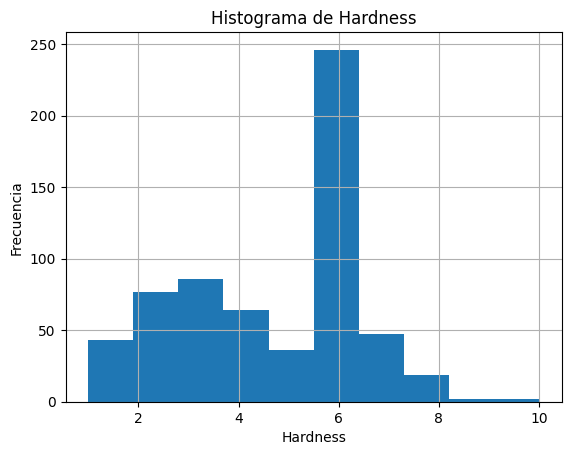

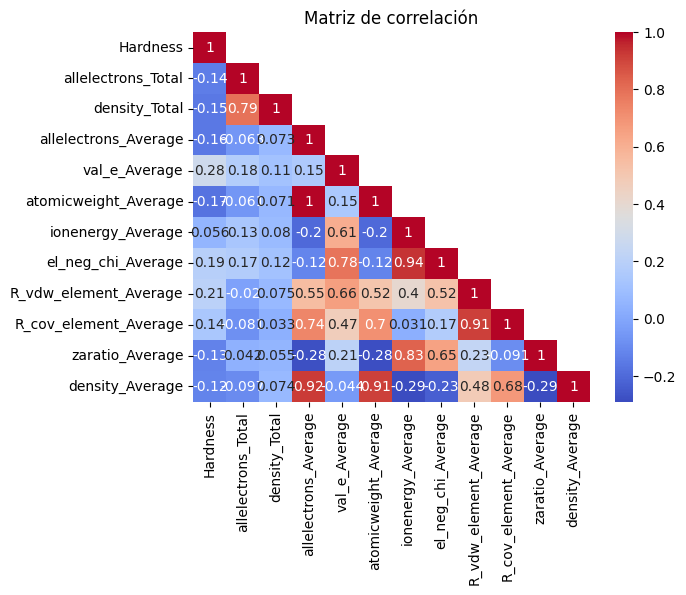

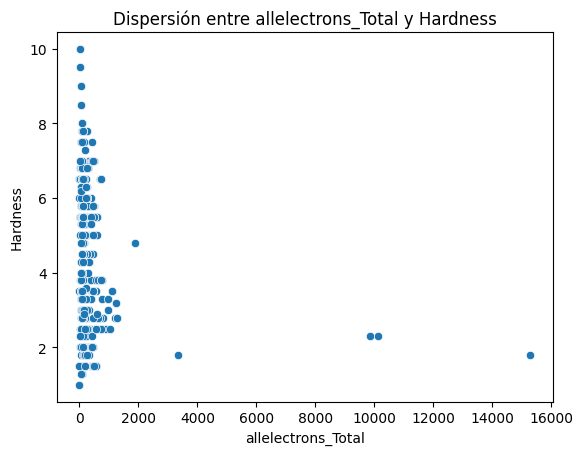

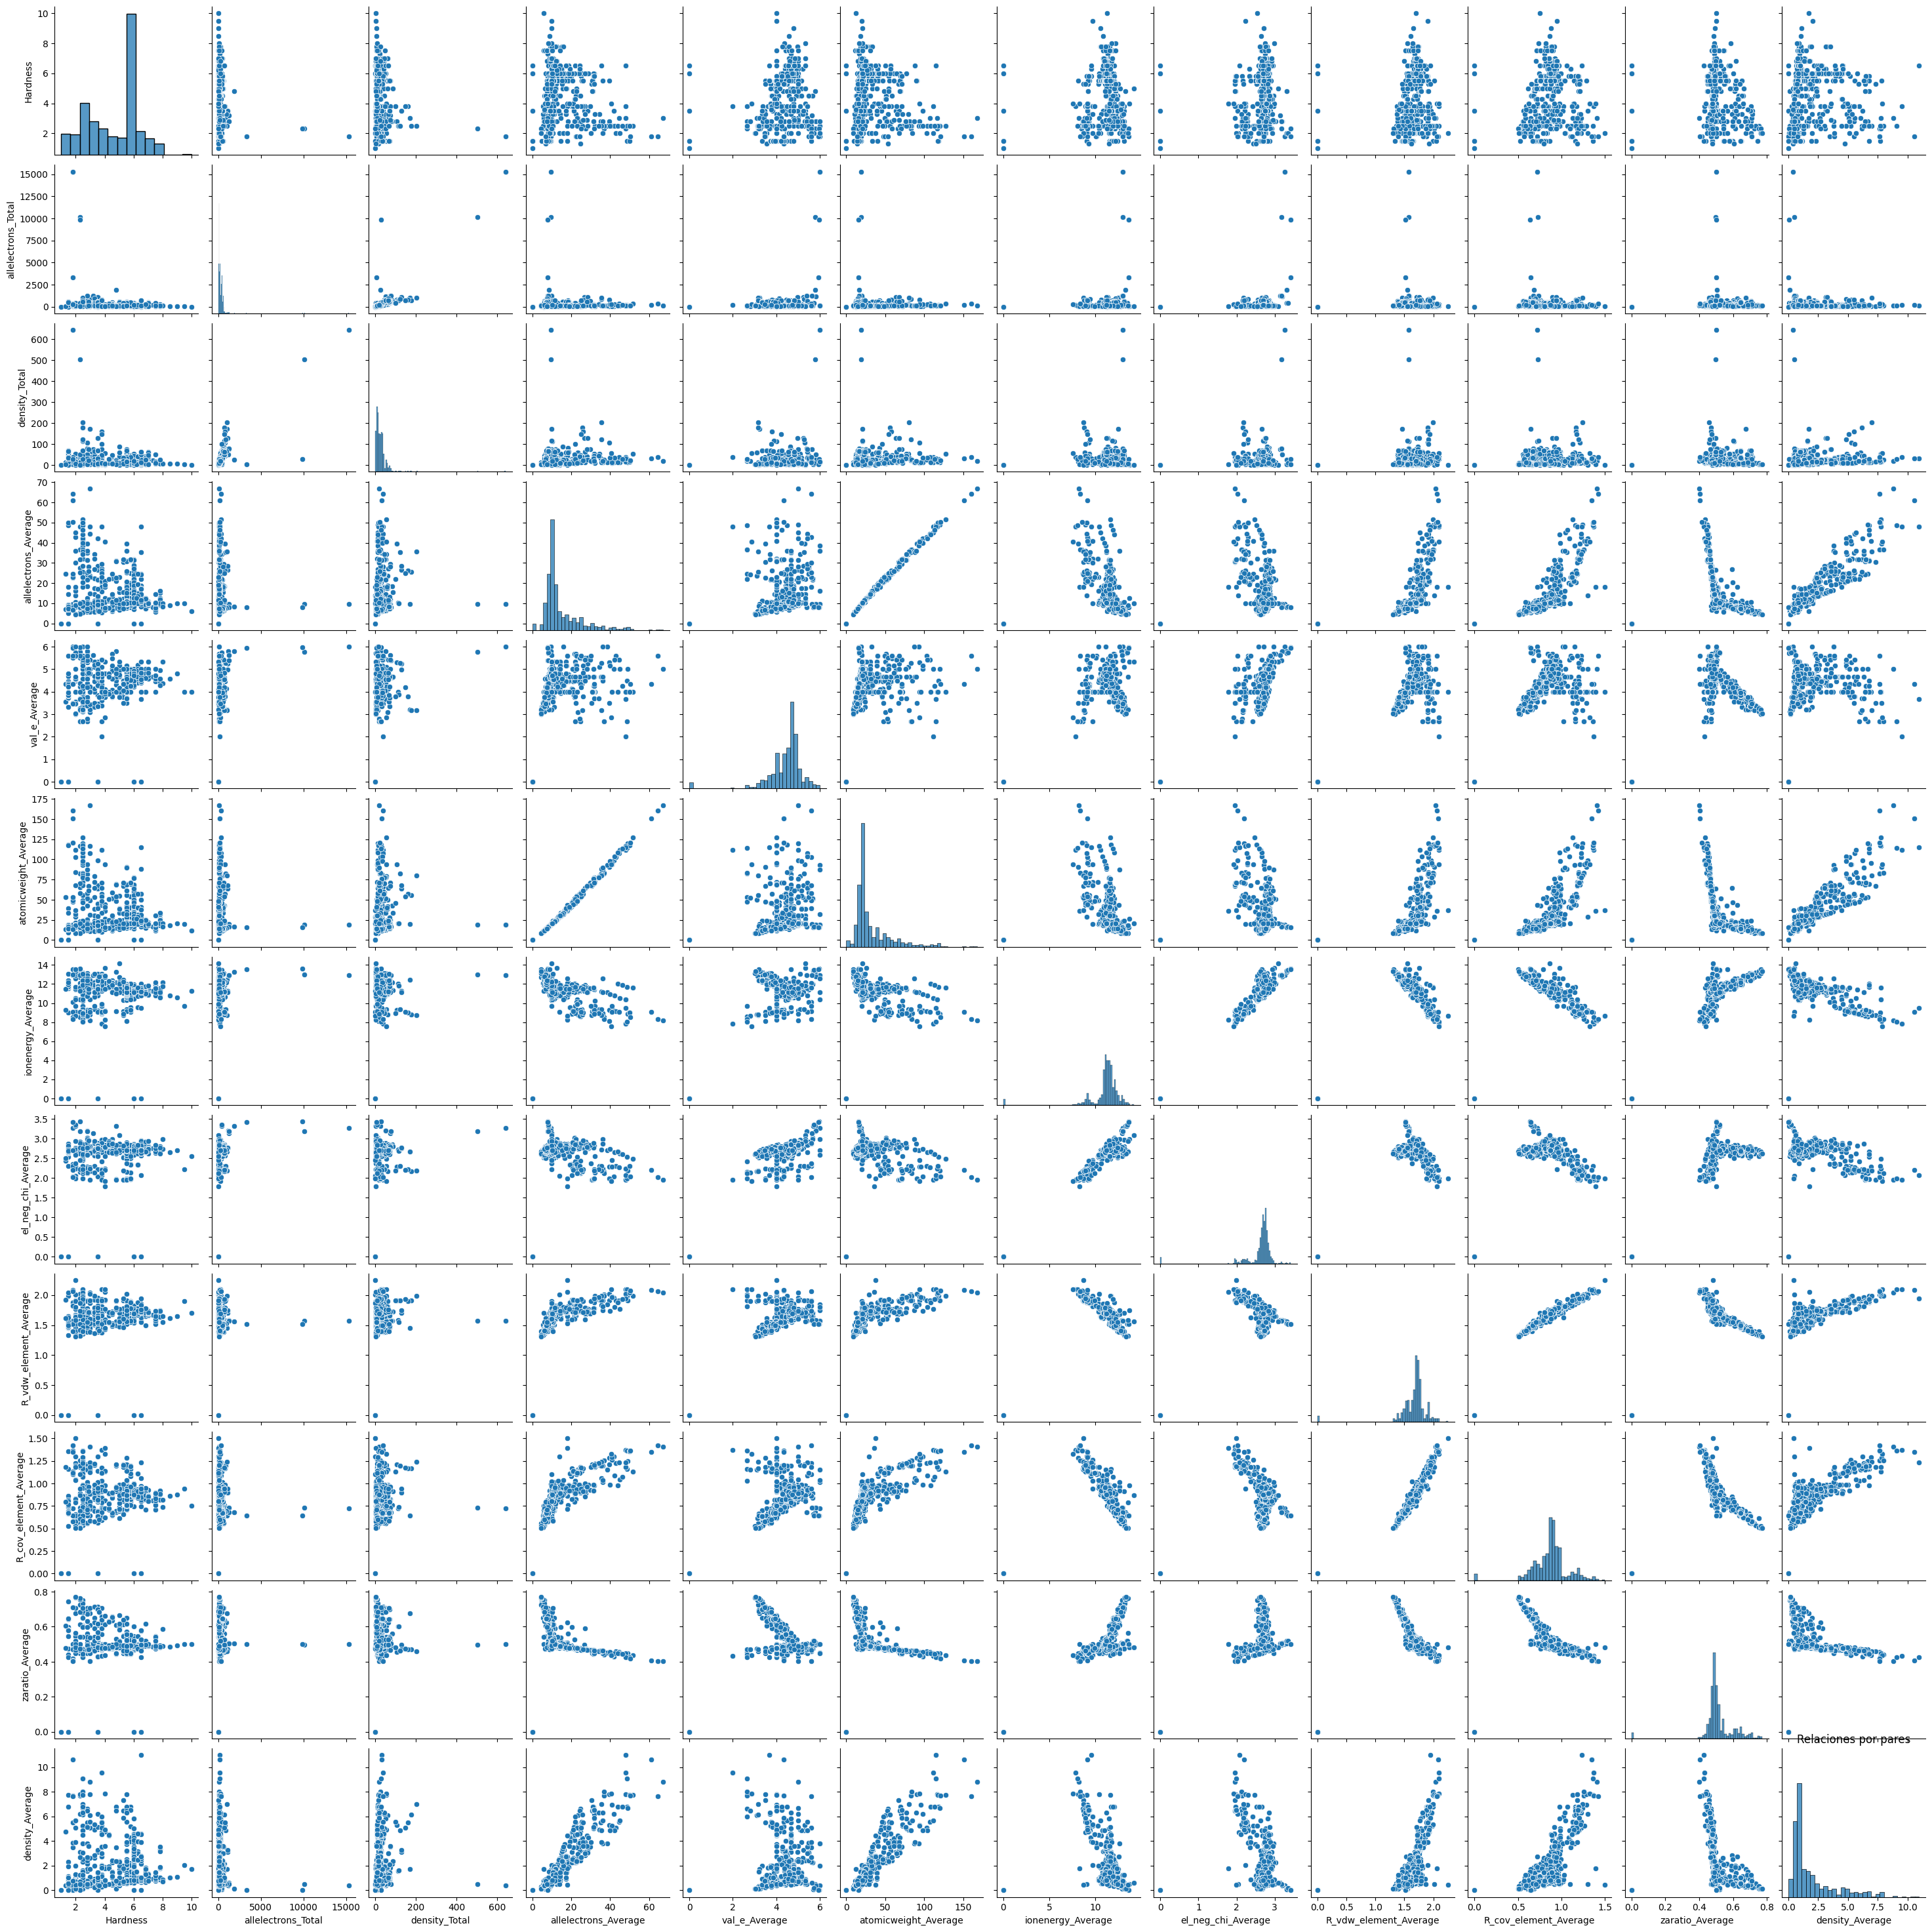

            PC1        PC2
0   -203.045265 -47.786817
1     93.163330  11.634926
2     93.161059  10.594359
3    164.221364  -6.973069
4    164.218675  -8.198365
..          ...        ...
617 -267.435030 -10.469301
618 -227.510857   8.685853
619 -275.484464  -1.905386
620 -227.432290   7.588989
621  -87.164689  14.180294

[622 rows x 2 columns]
     Hardness  allelectrons_Total  density_Total  allelectrons_Average  \
38        1.8             15300.0     643.093804              9.592476   
79        2.3             10116.0     502.575708              9.543396   
102       2.8               790.0     105.514000             39.500000   
117       2.8               696.0      82.398475             18.315789   
147       2.5               728.0     113.177292             10.111111   
150       2.5               720.0     116.129292             10.000000   
166       3.0               985.0     172.307110              9.752475   
181       5.5               488.0      73.790135            

In [7]:
analysis = MineralAnalysis(df_mineral_train)

# Estadísticas descriptivas
print(analysis.summary_statistics())

# Histograma para la variable Hardness
analysis.histogram('Hardness')

# Matriz de correlación
analysis.correlation_matrix()

# Gráfico de dispersión entre allelectrons_Total y Hardness
analysis.scatter_plot('allelectrons_Total', 'Hardness')

#Gráficos de dispersión
analysis.pair_plot()

#Distribución de las variables independientes
analysis.plot_hist()

# Análisis PCA
print(analysis.pca_analysis())

# Identificación de outliers en una variable específica
outliers = analysis.identify_outliers('density_Total')
print(outliers)


        Hardness  allelectrons_Total  density_Total  allelectrons_Average  \
count  52.000000           52.000000      52.000000             52.000000   
mean    5.448462          241.090558      26.747887             15.253121   
std     1.523433          293.470156      33.710283              8.419359   
min     2.500000            0.000000       0.000000              0.000000   
25%     4.500000          100.500000       9.539996             10.458333   
50%     5.500000          192.600000      21.887656             13.773810   
75%     6.500000          256.332500      27.983236             17.667846   
max     9.000000         2024.200000     236.459656             48.172299   

       val_e_Average  atomicweight_Average  ionenergy_Average  \
count      52.000000             52.000000          52.000000   
mean        4.379545             33.908160          10.660907   
std         1.117464             20.672876           2.353549   
min         0.000000              0.000000    

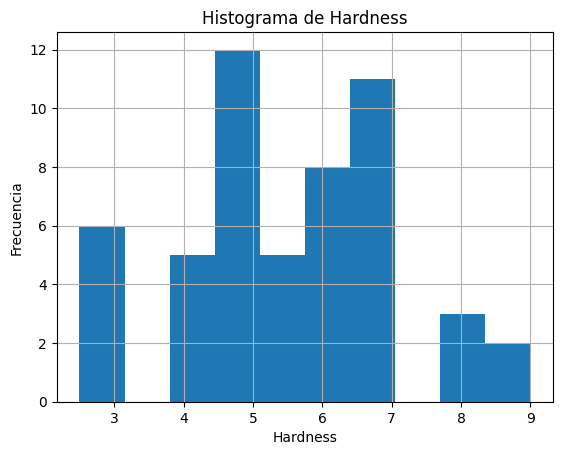

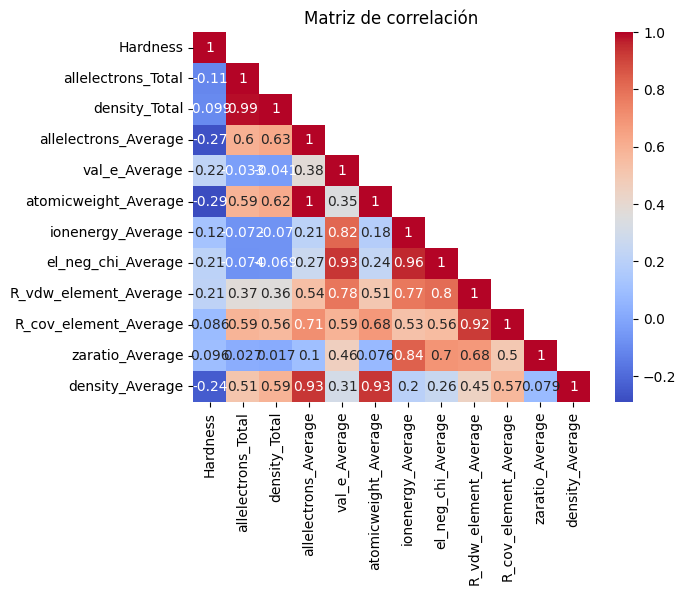

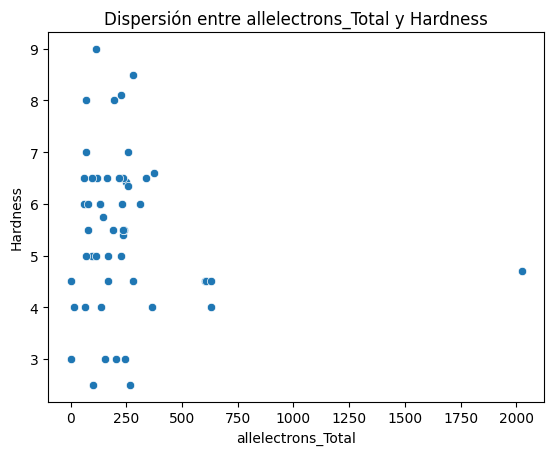

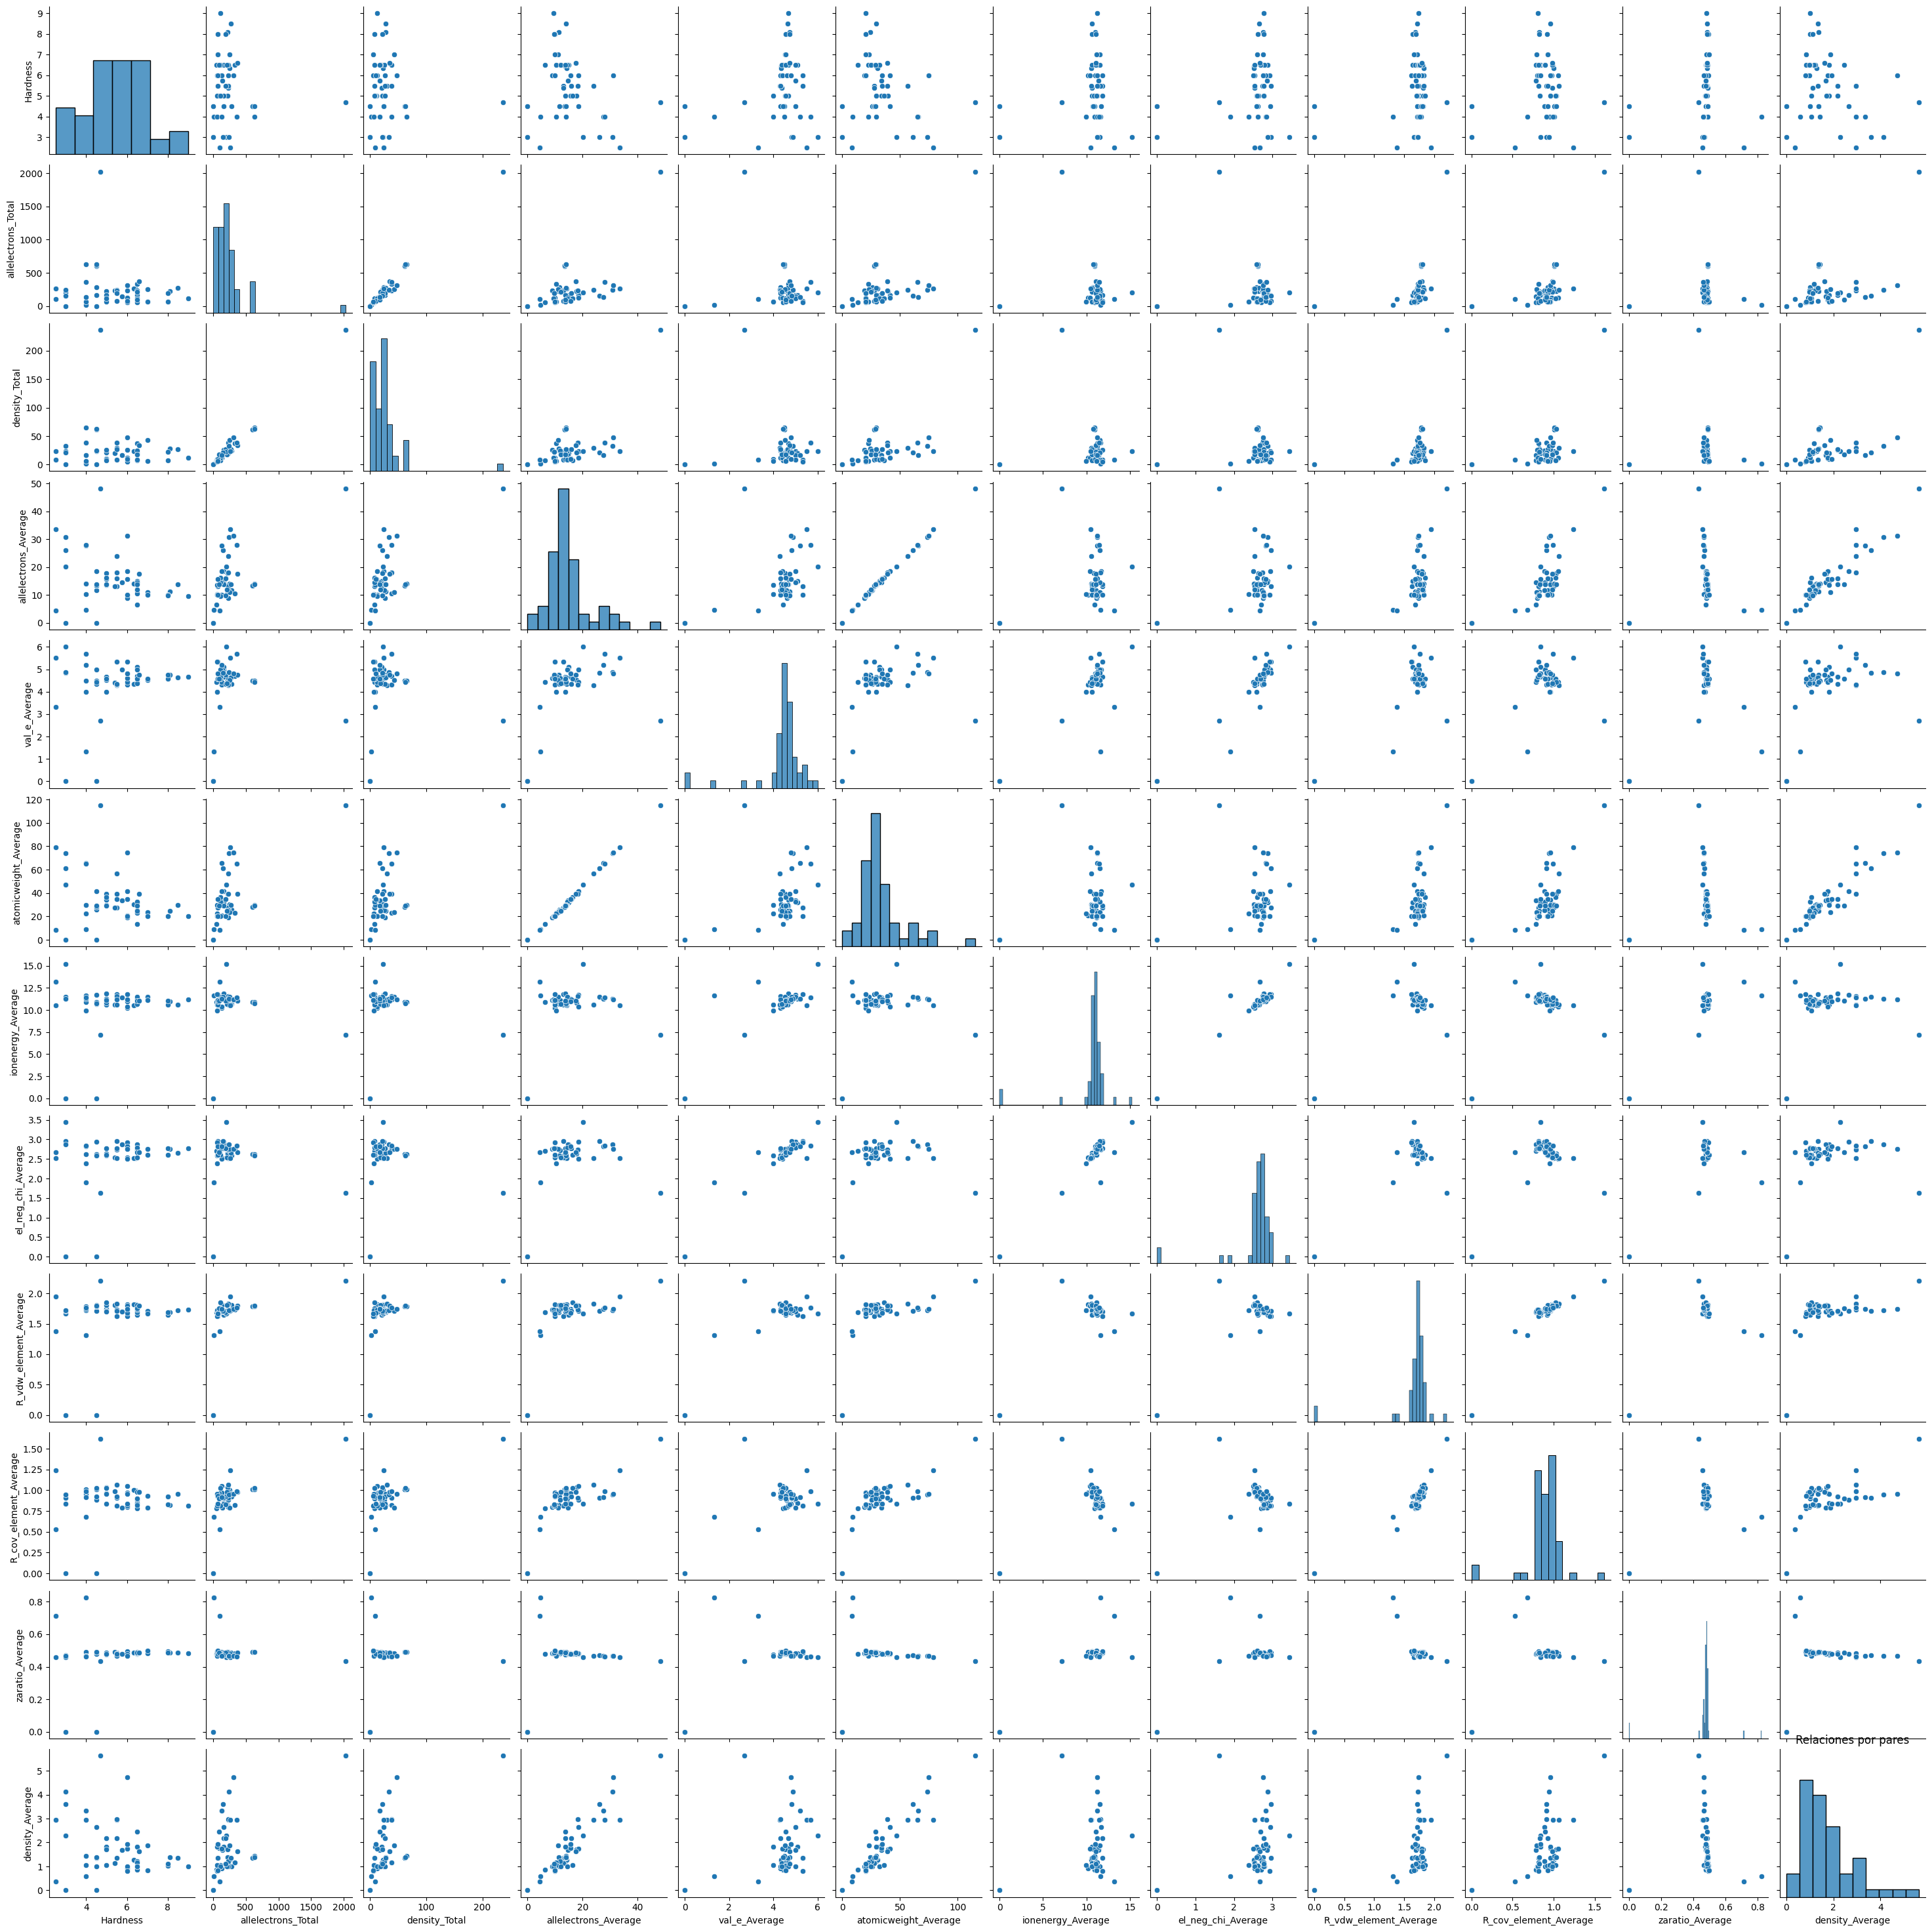

            PC1        PC2
0    -73.489010  12.233199
1   -229.453812 -16.950227
2   -141.359193 -21.455221
3   -164.294600   0.552946
4    -77.375674   1.797225
5   -184.896169 -13.956904
6    -95.521725   3.979816
7   -112.593923  -9.636748
8      7.460961  -5.569334
9     17.246190  -4.925647
10  -147.817680   6.868626
11  -174.008711   3.303101
12    37.933162 -11.192601
13    -7.079292  -6.900305
14   -15.356239  -9.169006
15   -38.610186  16.215021
16  -243.983218 -26.675466
17   -16.068252   6.447105
18  -112.059500  12.724336
19    -5.530797  -9.044646
20   363.837184 -23.066083
21   -74.843417  -0.757019
22    -0.470833  24.380671
23   365.046377 -23.064306
24  1797.506056   7.770262
25    94.890153 -16.202401
26    -9.847046 -15.530653
27  -126.349599   3.520390
28    36.458205  -6.418902
29   390.320880 -22.520967
30  -128.209360   7.953164
31  -172.689302  -6.850060
32    -3.452208   7.419988
33  -243.983218 -26.675466
34    15.558184 -10.482333
35  -180.621975  -4.468551
3

In [8]:
df_mineral_predict_cut = df_mineral_predict[['Hardness', 'allelectrons_Total',
       'density_Total', 'allelectrons_Average', 'val_e_Average',
       'atomicweight_Average', 'ionenergy_Average', 'el_neg_chi_Average',
       'R_vdw_element_Average', 'R_cov_element_Average', 'zaratio_Average',
       'density_Average']]
analysis_predict = MineralAnalysis(df_mineral_predict_cut)

# Estadísticas descriptivas
print(analysis_predict.summary_statistics())

# Histograma para la variable Hardness
analysis_predict.histogram('Hardness')

# Matriz de correlación
analysis_predict.correlation_matrix()

# Gráfico de dispersión entre allelectrons_Total y Hardness
analysis_predict.scatter_plot('allelectrons_Total', 'Hardness')

#Gráficos de dispersión
analysis_predict.pair_plot()

#Distribución de las variables independientes
analysis.plot_hist()

# Análisis PCA
print(analysis_predict.pca_analysis())

# Identificación de outliers en una variable específica
outliers = analysis_predict.identify_outliers('density_Total')
print(outliers)


<div style="border-radius:10px; border:#6B8BA0 solid; padding: 15px; background-color: #F2EADF; font-size:100%; text-align:left">

<h3 align="left"><font color='#6B8BA0'>📎 Pregunta 2 </font></h3> Utilizando la base de entrenamiento, cree una (1) predicción sobre la escala de dureza
de los 51 minerales sintéticos y describa el desempeño del modelo que creó.

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
x_train = df_mineral_train.drop('Hardness', axis=1)
y_train = df_mineral_train['Hardness']

x_test = df_mineral_predict.drop(['Formula', 'Crystal structure', 'Hardness'], axis=1)
y_test = df_mineral_predict['Hardness']

In [14]:
from lightgbm import LGBMRegressor

lgbm_params = {
    'num_leaves': 31,           # Número de hojas en un árbol. Un valor más alto puede llevar a un mejor rendimiento pero a un sobreajuste.
    'max_depth': -1,            # La profundidad máxima de los árboles. -1 significa sin límite.
    'learning_rate': 0.1,       # Tasa de aprendizaje. Un valor más bajo significa un aprendizaje más lento pero puede mejorar la precisión.
    'n_estimators': 100,        # Número de árboles a construir.
    'subsample': 1.0,           # Fracción de muestras a utilizar para ajustar cada árbol.
    'colsample_bytree': 1.0,    # Fracción de características a utilizar para ajustar cada árbol.
    'min_child_samples': 20,    # Número mínimo de muestras (observaciones) necesarias en una hoja.
    'reg_alpha': 0.0,           # Regularización L1 (lasso).
    'reg_lambda': 0.0,          # Regularización L2 (ridge).
    'random_state': 42          # Semilla para la reproducibilidad de resultados.
}


seed = 42  # Definir la semilla para la reproducibilidad

# Crear y entrenar el modelo LGBM
lgbmmodel = LGBMRegressor(**lgbm_params, device="gpu")
lgbmmodel.fit(x_train, y_train)

OSError: dlopen(/Users/csotor/.pyenv/versions/3.11.0rc1/envs/clavenv/lib/python3.11/site-packages/lightgbm/lib/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: <3AF1EF0C-311C-31EC-BCE3-679F37ABEE16> /Users/csotor/.pyenv/versions/3.11.0rc1/envs/clavenv/lib/python3.11/site-packages/lightgbm/lib/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file, not in dyld cache)

In [13]:
# Realizar pruebas de desempeño usando cross_val_score
scores = cross_val_score(lgbmmodel, x_train, y_train, cv=5)  # cv es el número de pliegues en la validación cruzada

# Imprimir los resultados
print("Scores de validación cruzada:", scores)
print("Promedio de los scores:", scores.mean())


# Realizar predicciones con el modelo entrenado
y_pred_lgbmmodel = lgbmmodel.predict(x_test)

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred_lgbmmodel)
print("Mean Absolute Error (MAE):", mae)

# Calcular MSE
mse = mean_squared_error(y_test, y_pred_lgbmmodel)
print("Mean Squared Error (MSE):", mse)

# Calcular RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calcular R-squared
r2 = r2_score(y_test, y_pred_lgbmmodel)
print("R-squared:", r2)

NameError: name 'lgbmmodel' is not defined

    Scores de Validación Cruzada: Los valores [0.644, 0.545, 0.615, 0.330, 0.546] son los scores obtenidos en cada pliegue de una validación cruzada de 5 pliegues. Estos scores suelen ser el coeficiente de determinación (R2R2) para cada pliegue. Un valor de R2R2 más cercano a 1 indica un mejor ajuste del modelo. La variabilidad en estos scores sugiere que el rendimiento del modelo puede cambiar significativamente dependiendo de la partición específica de los datos utilizada para entrenar y probar.

    Promedio de los Scores: El promedio de los scores de validación cruzada es 0.536. Esto indica que, en promedio, tu modelo explica aproximadamente el 53.6% de la variabilidad en la variable objetivo a través de los distintos pliegues de validación cruzada. Es una medida de rendimiento general del modelo.

    Mean Absolute Error (MAE): El MAE de 0.786 significa que, en promedio, las predicciones de tu modelo se desvían en 0.786 unidades del valor real. Es una medida de cuán cercanas son las predicciones a los valores reales, sin considerar la dirección del error.

    Mean Squared Error (MSE): El MSE de 0.962 es una medida del error cuadrático medio de tus predicciones. Al cuadrar los errores antes de promediar, el MSE da un peso mayor a los errores más grandes.

    Root Mean Squared Error (RMSE): El RMSE de 0.981 es la raíz cuadrada del MSE y proporciona una idea de la magnitud del error en las mismas unidades que la variable objetivo. Un RMSE más bajo es mejor, y un RMSE de 0.981 indica que la desviación típica de las predicciones del modelo respecto a los valores reales es de aproximadamente 0.981 unidades.

    R-squared (R2R2): Un R2R2 de 0.578 indica que aproximadamente el 57.8% de la variabilidad en la variable objetivo es explicada por el modelo. Un valor más alto es generalmente mejor, indicando que el modelo se ajusta bien a los datos.

<div style="border-radius:10px; border:#6B8BA0 solid; padding: 15px; background-color: #F2EADF; font-size:100%; text-align:left">

<h3 align="left"><font color='#6B8BA0'>📎 Pregunta 3 </font></h3> Aplique alguna estrategia de mejoramiento de desempeño del modelo, describiendo 
por qué la utilizó y mostrando cuánto mejoró versus el modelo inicial del punto 2

In [ ]:
# Entrenamiento
seed = 42
rfmodel = RandomForestRegressor(random_state=seed)
rfmodel.fit(x_train, y_train)

In [ ]:
# Realizar pruebas de desempeño usando cross_val_score
scores = cross_val_score(rfmodel, x_train, y_train, cv=5)  # cv es el número de pliegues en la validación cruzada

# Imprimir los resultados
print("Scores de validación cruzada:", scores)
print("Promedio de los scores:", scores.mean())


# Realizar predicciones con el modelo entrenado
y_pred_rfmodel = rfmodel.predict(x_test)

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred_rfmodel)
print("Mean Absolute Error (MAE):", mae)

# Calcular MSE
mse = mean_squared_error(y_test, y_pred_rfmodel)
print("Mean Squared Error (MSE):", mse)

# Calcular RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calcular R-squared
r2 = r2_score(y_test, y_pred_rfmodel)
print("R-squared:", r2)

    Scores de Validación Cruzada: Obtuviste scores de [0.672, 0.527, 0.495, 0.404, 0.545] en la validación cruzada. Aunque estos valores muestran cierta variabilidad, el promedio de 0.529 sugiere un ajuste moderado. Estos valores son ligeramente inferiores a los del modelo LightGBM, lo que indica que el modelo de bosque aleatorio no mejoró significativamente en términos de ajuste.

    Mean Absolute Error (MAE): El MAE de 0.728 es ligeramente inferior al MAE del modelo LightGBM (0.786), lo que sugiere una ligera mejora en términos de la precisión de las predicciones del modelo.

    Mean Squared Error (MSE) y Root Mean Squared Error (RMSE): El MSE de 0.889 y el RMSE de 0.943 son menores que los del modelo LightGBM (MSE: 0.962 y RMSE: 0.981), indicando una mejora en la precisión de las predicciones.

    R-squared: El R² de 0.610 es superior al R² del modelo LightGBM (0.578), lo que significa que este modelo explica un porcentaje mayor de la variabilidad en la dureza de los minerales sintéticos.

Conclusión y Comparación con el Modelo Inicial:

El uso del modelo de Regresión de Bosque Aleatorio ha llevado a una mejora modesta en la precisión de las predicciones (MAE, MSE, RMSE) y una mejora notable en el ajuste del modelo (R²) en comparación con el modelo LightGBM inicial. Esto demuestra la eficacia de los modelos de bosques aleatorios en este tipo de tareas de regresión. Sin embargo, la mejora no es drásticamente alta, lo que sugiere que aún hay espacio para explorar otras técnicas de mejora, como la optimización de hiperparámetros, la ingeniería de características adicionales o incluso la combinación de modelos para mejorar aún más la precisión y el rendimiento del modelo.